In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import scipy
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
x1=pd.read_csv('/content/drive/MyDrive/Uni/iris.csv')
x1

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
x1.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
x1.head(15)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [8]:
x1.tail(15)

,sepal.length,sepal.width,petal.length,petal.width,variety
135,7.7,3.0,6.1,2.3,Virginica
136,6.3,3.4,5.6,2.4,Virginica
137,6.4,3.1,5.5,1.8,Virginica
138,6.0,3.0,4.8,1.8,Virginica
139,6.9,3.1,5.4,2.1,Virginica
140,6.7,3.1,5.6,2.4,Virginica
141,6.9,3.1,5.1,2.3,Virginica
142,5.8,2.7,5.1,1.9,Virginica
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica


In [9]:
x1.nunique

<bound method DataFrame.nunique of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

In [10]:
x1.size

750

In [11]:
x1.shape

(150, 5)

In [12]:
x1.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [13]:
x1.isnull()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [14]:
x1.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [15]:
x1.mean()

<ipython-input-15-419f6ec5e58d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x1.mean()


sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64

In [16]:
x=x1['sepal.length']
y=x1['petal.width']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [17]:
print(x_train)

61     5.9
92     5.8
112    6.8
2      4.7
141    6.9
      ... 
9      4.9
103    6.3
67     5.8
117    7.7
47     4.6
Name: sepal.length, Length: 112, dtype: float64


In [18]:
print(x_test)

114    5.8
62     6.0
33     5.5
107    7.3
7      5.0
100    6.3
40     5.0
86     6.7
76     6.8
71     6.1
134    6.1
51     6.4
73     6.1
54     6.5
63     6.1
37     4.9
78     6.0
90     5.5
45     4.8
16     5.4
121    5.6
66     5.6
24     4.8
8      4.4
126    6.2
22     4.6
44     5.1
97     6.2
93     5.0
26     5.0
137    6.4
84     5.4
27     5.2
127    6.1
132    6.4
59     5.2
18     5.7
83     6.0
Name: sepal.length, dtype: float64


In [19]:
print(y_train)

61     1.5
92     1.2
112    2.1
2      0.2
141    2.3
      ... 
9      0.1
103    1.8
67     1.0
117    2.2
47     0.2
Name: petal.width, Length: 112, dtype: float64


In [20]:
print(y_test)

114    2.4
62     1.0
33     0.2
107    1.8
7      0.2
100    2.5
40     0.3
86     1.5
76     1.4
71     1.3
134    1.4
51     1.5
73     1.2
54     1.5
63     1.4
37     0.1
78     1.5
90     1.2
45     0.3
16     0.4
121    2.0
66     1.5
24     0.2
8      0.2
126    1.8
22     0.2
44     0.4
97     1.3
93     1.0
26     0.4
137    1.8
84     1.5
27     0.2
127    1.8
132    2.2
59     1.4
18     0.3
83     1.6
Name: petal.width, dtype: float64


In [21]:
xx = x1.iloc[:,:-1]
yy = x1.iloc[:,1]

In [33]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)

In [23]:
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_trainp=classifier.predict(x_train)

ValueError: Expected 2D array, got 1D array instead:
array=[5.9 5.8 6.8 4.7 6.9 5.  5.4 5.  6.5 6.7 6.  6.7 5.6 7.7 6.3 5.5 6.3 6.3
 4.9 6.3 7.  6.5 6.  4.8 5.8 5.6 5.6 5.5 6.1 7.2 5.3 4.3 6.4 5.7 5.4 5.7
 6.9 4.6 5.9 5.1 4.6 6.2 7.2 5.7 4.8 7.1 6.9 6.5 6.4 5.1 4.8 6.5 6.7 4.5
 6.2 4.9 5.7 6.9 4.4 5.  7.2 5.1 4.4 5.4 5.5 6.8 7.6 5.1 4.9 5.2 5.7 6.6
 5.  5.1 6.4 5.4 7.7 4.9 7.9 6.7 5.2 6.  5.8 7.7 5.1 4.7 7.4 5.  6.3 5.7
 5.8 5.7 6.4 6.7 6.3 6.7 5.  5.5 6.7 5.8 5.1 6.6 5.6 5.9 6.3 5.5 5.1 4.9
 6.3 5.8 7.7 4.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

<ipython-input-31-c479fd255012>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=x1.corr()
<ipython-input-31-c479fd255012>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x1.corr(),annot=True,fmt='.3f')


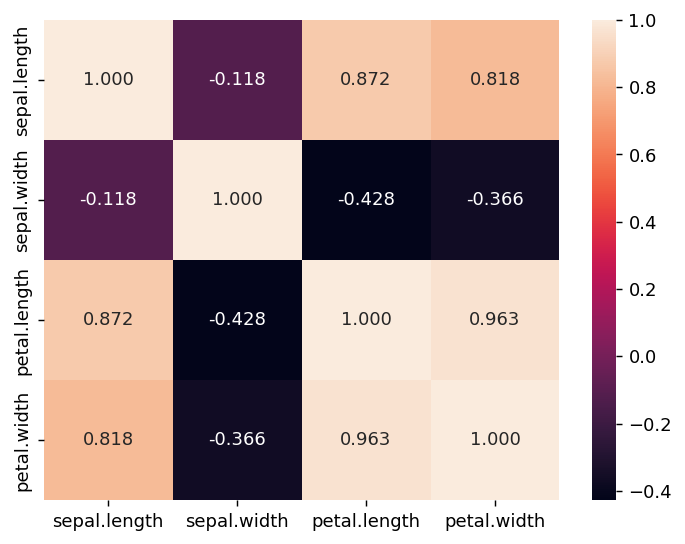

In [31]:
corr=x1.corr()
plt.figure(dpi=130)
sns.heatmap(x1.corr(),annot=True,fmt='.3f')
plt.show()

In [27]:
corr['petal.width'].sort_values(ascending=False)

sepal.length    1.000000
petal.length    0.871754
petal.width     0.817941
sepal.width    -0.117570
Name: sepal.length, dtype: float64

In [28]:
corr['petal.length'].sort_values(ascending=False)

sepal.width     1.000000
sepal.length   -0.117570
petal.width    -0.366126
petal.length   -0.428440
Name: sepal.width, dtype: float64

In [29]:
corr['sepal.width'].sort_values(ascending=False)

sepal.width     1.000000
sepal.length   -0.117570
petal.width    -0.366126
petal.length   -0.428440
Name: sepal.width, dtype: float64

In [30]:
corr['sepal.length'].sort_values(ascending=False)

sepal.length    1.000000
petal.length    0.871754
petal.width     0.817941
sepal.width    -0.117570
Name: sepal.length, dtype: float64

In [32]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy: ',accuracy)


NameError: name 'y_pred' is not defined